# Exploratory Analysis into The Hut Group's Fraud Dataset

It makes sense to first look at what data, lookups and meta-descriptions are included in the data.

In [1]:
from glob import glob
import os

%matplotlib inline


dir = "/home/tpin3694/Documents/university/MSc/fundamental/THG-Jarvis/"
for file in glob(os.path.join(dir, "*.*")):
    print(file.replace(dir, ""))

MAIN_chargeback_data.csv
country_code_lookup.csv
payment_method_lookup.csv
medium_lookup.csv
locale_lookup.csv
MAIN_customer_data.csv
MAIN_transaction_data.csv
payment_status_lookup.csv
payment_provider_lookup.csv
delivery_option_lookup.csv
Read me.docx


We're immediately interested in the customer and transaction datasets.

## Transaction Data

It appears there are a few errors in the file, namely in the later few columns nd with the files encryption. To get around this a few extra arguments need to be passed to the read_csv argument.

In [2]:
import pandas as pd

customer_trans = pd.read_csv(dir+"MAIN_transaction_data.csv", parse_dates=True,
                             encoding = "ISO-8859-1", usecols = list(range(23)))

print(customer_trans.shape)
print(customer_trans.info())

(418334, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418334 entries, 0 to 418333
Data columns (total 23 columns):
Order_Number                     418334 non-null int64
Account_Key                      418334 non-null int64
Delivery_Option_Type_Key         418334 non-null int64
Order_Date_Key                   418334 non-null int64
Payment_Method_Key               418334 non-null int64
Locale_Key                       418334 non-null int64
Order_Sequence_No                418334 non-null int64
Medium_Key                       418334 non-null int64
Campaign_Key                     418334 non-null int64
Order_Payment_Status_Key         418334 non-null int64
Payment_Provider_Key             418334 non-null int64
Ordered_Product_Key              418334 non-null int64
Category_Level_2                 418182 non-null object
Category_Level_3                 418182 non-null object
Product_Charge_Price             418334 non-null float64
Ordered_Qty                      418334 non-nul

It would make sense to first take a look at the distributions of certain vairables, particurly the charge price. Within the dataset, charge price is the sum of the number of times that the respective product is in a customer's basket, so it must first be divided.

/home/tpin3694/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)
/home/tpin3694/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


55.0
64.6
74.99
109.67
212.429502
12749.99


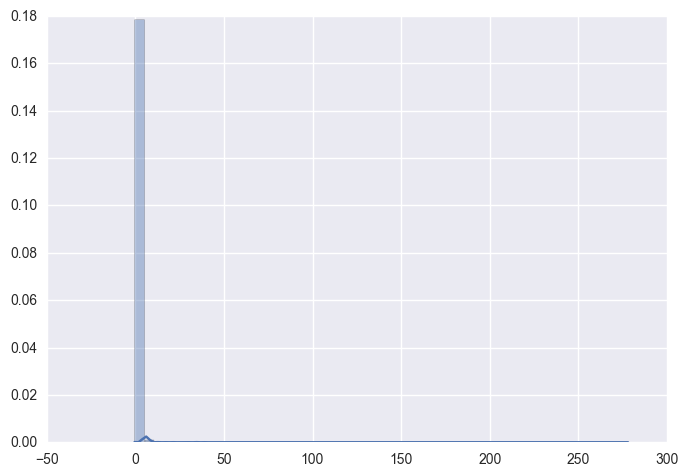

In [3]:
import seaborn as sns
from sklearn import preprocessing
import numpy as np


def pd_std(df_col):
    vec_col = df_col.as_matrix().astype(int)
    std_vec = preprocessing.scale(vec_col)
    return std_vec

charge_by_order = pd_std(customer_trans['Product_Charge_Price']/customer_trans["Ordered_Qty"])
sns.distplot(charge_by_order)

import numpy as np
top_perc = list(np.percentile(customer_trans['Product_Charge_Price'], q = list(range(95, 101))))
print(*top_perc, sep = "\n")


So it appears there are some rather large outliers in terms of price, it could be useful to seperate out these high pricing orders into a seperate dataframe.

In [4]:
import math
thresh = math.floor(len(customer_trans)*0.01)
high_pricing = customer_trans.nlargest(thresh, "Product_Charge_Price")
low_pricing = customer_trans.nsmallest(len(customer_trans)-thresh, "Product_Charge_Price")

low_price_std = pd_std(low_pricing)

sns.distplot(low_pricing)

ValueError: cannot convert float NaN to integer